# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [186]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [187]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
y = np.array([6, 2, 5, 7]) 

In [188]:
def max_element(arr):
    return np.nanmax(np.append(np.take(np.append(arr, np.NaN), np.where(arr == 0)[0] + 1), np.NaN))

In [189]:
max_element(x)

5.0

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [190]:
def nearest_value(X, v):
    nearest = (np.abs(np.asarray(X).reshape(-1)-v)).argmin()
    return np.asarray(X).reshape(-1)[nearest]

In [191]:
X = np.arange(0,10).reshape((2, 5)) 
v = 3.6

In [192]:
nearest_value(X, v)

4

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

Если в столбце будет встречаться два одинаковых числа, тогда не будем их нормировать.

In [193]:
def scale(X):
    row_mean = X.sum(axis=0)/X.shape[0]
    row_std = X.std(axis=0)
    if len(np.where(row_std == 0)[0])>0:
        np.put(row_mean, np.where(row_std == 0)[0], 0)
        np.put(row_std, np.where(row_std == 0)[0], 1)
    else:
        pass
    new_matrix = (X - row_mean[np.newaxis, :])/row_std[np.newaxis, :]
    return new_matrix

In [194]:
X = np.random.randint(20, size=(4, 4))
X

array([[ 7,  0, 12,  2],
       [ 6, 19, 18,  0],
       [ 8,  9, 12, 10],
       [10, 14, 14, 13]])

In [195]:
scale(X)

array([[-0.50709255, -1.49618805, -0.81649658, -0.78666618],
       [-1.18321596,  1.21119985,  1.63299316, -1.15686203],
       [ 0.16903085, -0.21374115, -0.81649658,  0.69411722],
       [ 1.52127766,  0.49872935,  0.        ,  1.249411  ]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [202]:
def get_stats(X):
    print('Определитель: ' + str(np.linalg.det(X)), 
          'След: ' + str(X.trace()),
          'Наибольший элемент: ' + str(np.max(X)),
          'Наименьший элемент: ' + str(np.min(X)),
          'Норма Фробениуса: ' + str(np.linalg.norm(X, ord = 'fro')),
          'Собственные числа: ', (np.linalg.eig(X)[0]),
          'Обратная матрица: ', (np.linalg.inv(X)), sep = '\n')

In [203]:
X = 1 * np.random.randn(3, 3) + 10
X

array([[ 11.2023034 ,  11.11574231,   9.49683968],
       [  9.75326808,  10.56338865,   9.7902773 ],
       [  8.49409322,  10.40144802,  10.19405587]])

In [204]:
get_stats(X)

Определитель: -3.9461894862
След: 31.9597479262
Наибольший элемент: 11.2023034003
Наименьший элемент: 8.49409322308
Норма Фробениуса: 30.4312463754
Собственные числа: 
[ 30.33000339   1.70600932  -0.07626479]
Обратная матрица: 
[[-1.48262362  3.68294883 -2.15584963]
 [ 4.12190843 -8.49677019  4.32022675]
 [-2.97038523  5.60085244 -2.51368312]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [205]:
max_array = np.array([])
for exp_num in range(100):
    X = np.dot(np.random.randn(10, 10), np.random.randn(10, 10))
    max_array = np.append(max_array, np.max(X))

In [206]:
max_array.mean()

8.4224487153812699

In [207]:
np.percentile(max_array, 95)

12.367458550536236

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?

In [228]:
import pandas as pd
import seaborn as sns
import numpy as np 
import missingno as msno
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [229]:
df = pd.read_csv('2008.csv')
cols = df.columns.tolist()
cols.remove('DepDelay')
cols.append('DepDelay')
df = df[cols]
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,16.0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,16.0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-2.0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-3.0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-5.0


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?

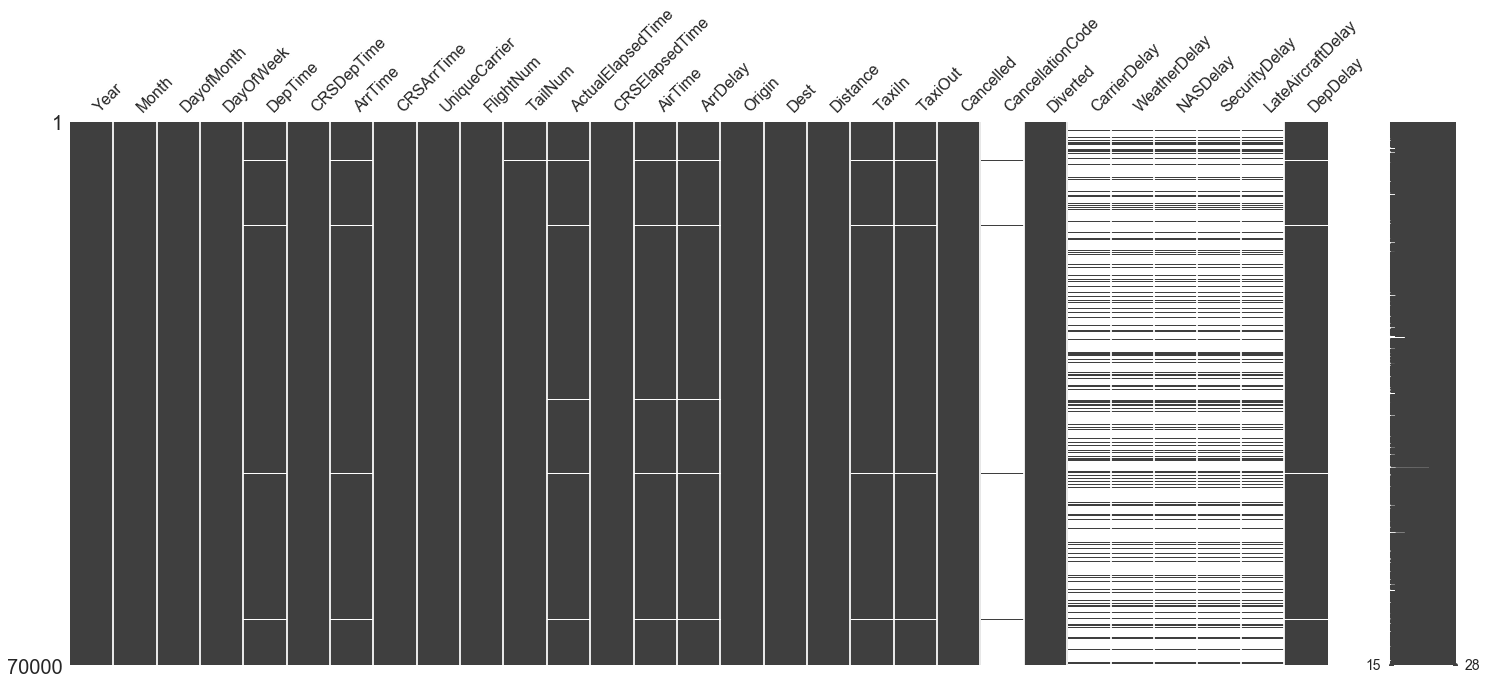

In [230]:
msno.matrix(df)

Да, на данном рисунке видно, что имеются пропущенные значения.

   - Сколько всего пропущенных элементов в таблице "объект-признак"?

In [231]:
df.isnull().values.sum()

355215

   - Сколько объектов имеют хотя бы один пропуск?

In [232]:
df.isnull().any(axis=1).sum()

70000

   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [233]:
df.isnull().any(axis=0).sum()

16

In [234]:
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
DepDelay              1399
dtype: int64

- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

In [235]:
df_nodep = df[df['DepDelay'].isnull()]
df_dep = df[df['DepDelay'].notnull()]

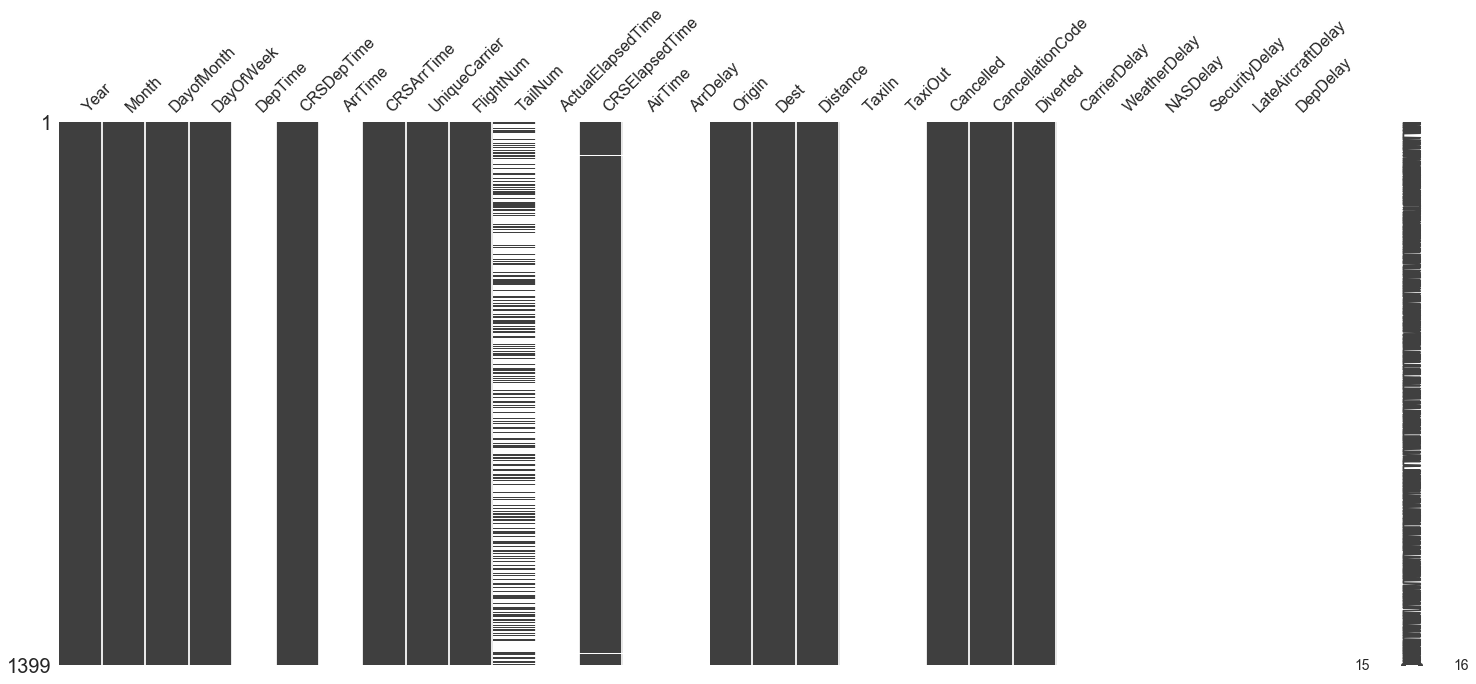

In [236]:
msno.matrix(df_nodep)

Исходя из приведенной выше матрицы пропущенных значений, можно сделать следующие выводы. Данное явление вызвано тем, что самолеты не совершили вылет (причину отмены рейса можно найти в переменной _CancellationCode_). Как итог, значение переменной _DepDelay_ отсутствует (иначе говоря, вылет отложен навсегда). Помиомо невылета из аэропорта данные объекты объединяет отсутствие многих переменных, список которых приведен ниже: 

In [237]:
for i in df_nodep.columns:
    if df_nodep[i].notnull().sum() == 0:
        print(i)

DepTime
ArrTime
ActualElapsedTime
AirTime
ArrDelay
TaxiIn
TaxiOut
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DepDelay


Для того, чтобы понять, какие признаки исключить, посмотрим на аналогичную матрицу для тех случаев, когда вылет был совершен. Также посмотрим на тепловую карту.

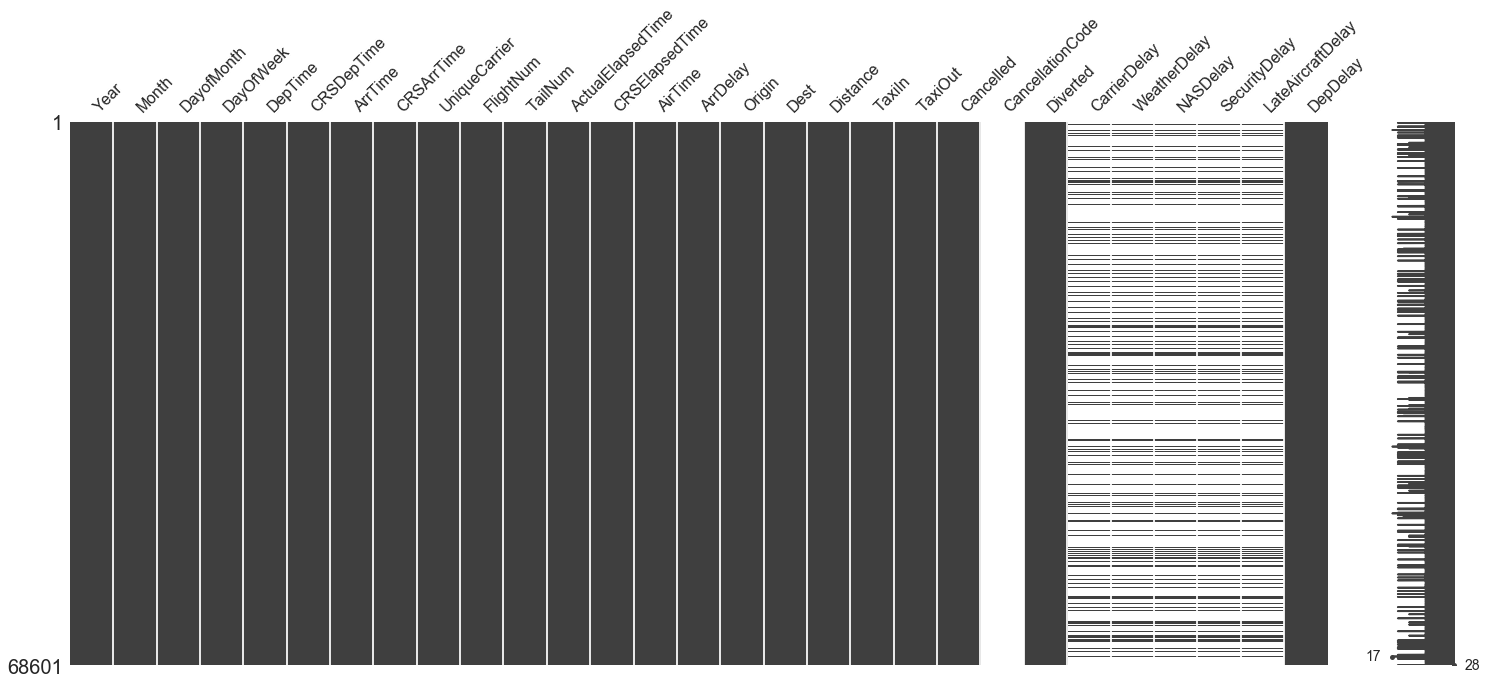

In [238]:
msno.matrix(df_dep)

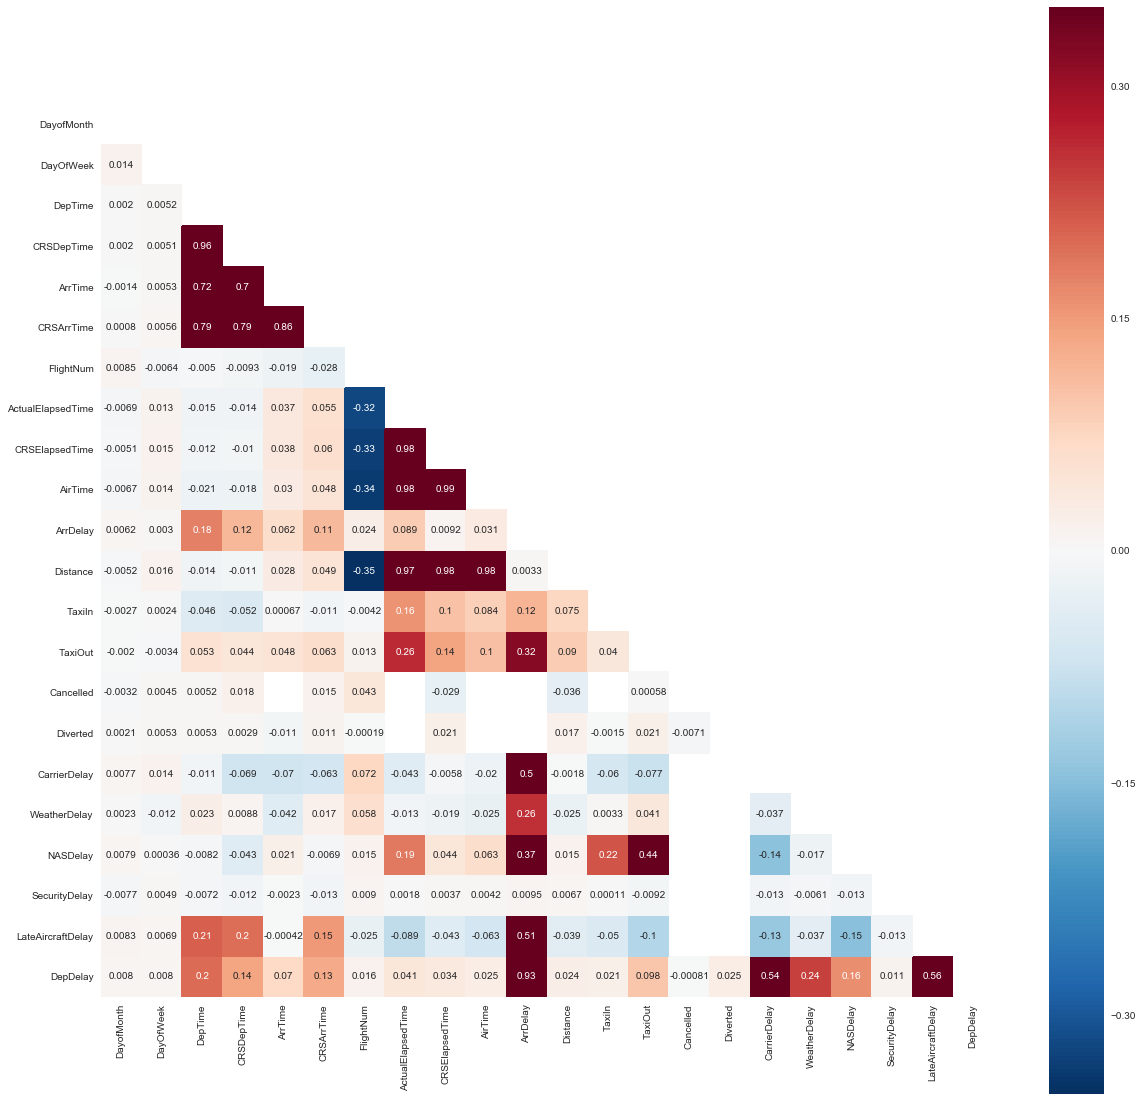

In [239]:
corr = df[df.columns[2:]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = plt.figure(figsize = (20,20))
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True)

Давайте еще посмотрим, какие значения принимает переменная _Cancelled_.

In [240]:
df_dep['Cancelled'].value_counts()

0    68589
1       12
Name: Cancelled, dtype: int64

In [241]:
df_nodep['Cancelled'].value_counts()

1    1399
Name: Cancelled, dtype: int64

Можно сделать вывод, что от от переменной _CancellationCode_ можно избавиться, так как она присутствует только в том случае, если полет был отменен и для предсказания значения целевой переменной бесполезна, так как об отмене рейса можно узнать с помощью переменной _Cancelled_. Более того, рассматривать отмененные рейсы не имеет смысла, так как про отмену рейса можно со стопроцентной точностью узнать по признаку _cancelled_. Поэтому от него можно избавиться.

Стоит отметить, что переменная _Cancelled_ наблюдается в датафрейме, где целевая переменная принимает ненулевые значения. Это можно списать на ошибку, так как если рейс отменяют, тогда он не соершает вылета из аэропорта. 

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [242]:
df = df.drop(df[df['DepDelay'].isnull()].index)
df = df.drop(df[df['DepDelay'] == 0].index)
DepDelay = df['DepDelay']
df = df.drop(['Cancelled', 'CancellationCode', 'DepDelay'], 1)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [243]:
def time_manager(df, feature):
    df[feature] = df[df[feature].notnull()][feature].apply(lambda x: str(int(x)).zfill(4))
    df[feature + '_Hour'] = df[df[feature].notnull()][feature].str[:2].astype(int)
    df[feature + '_Minute'] = df[df[feature].notnull()][feature].str[2:].astype(int)
    df.drop(feature, 1, inplace = True)

In [244]:
for i in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    time_manager(df, i)

In [245]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21,11,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14,26,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11,43,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11,41,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8,15,8,20,12.0,43.0,13,0


**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Изучив уже построенную корреляционную таблицу, можно прийти к выводу, переменная _ArrDelay_ сильно коррелирует с целевой переменной. Это логично, так как если самолет позже вылетает, тогда он позже прилетает. Поэтому исключить стоит именное её. 

In [246]:
df = df.drop(['ArrDelay', 'TailNum', 'Year', 'CRSDepTime_Hour', 'ArrTime_Hour', 'CRSArrTime_Hour', 'FlightNum', 'DepTime_Minute', 'CRSDepTime_Minute', 'ArrTime_Minute', 'CRSArrTime_Minute', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 1)

'SecurityDelay', 'CarrierDelay','WeatherDelay', 'NASDelay', 'LateAircraftDelay' - это переменные, которые стоит удалить, так как сумма этих переменных демонстрирует сильную корреляцию с целевой переменной. Также стоит избавиться от переменной 'FlightNum', так как она является уникальной для каждого рейса. Удалим все переменные связанные со временем,кроме 'DepTime_Hour', так как оказывать влияние на целевую переменную из них может только время вылета в в часах. Кроме того, считать их как вещественные нельзя, поэтому во избежание излишнего количества признаков удалим их.

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

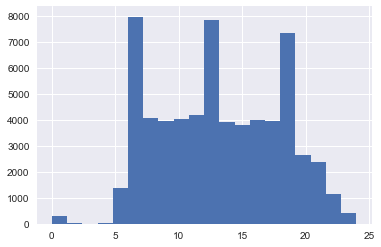

In [58]:
df['DepTime_Hour'].hist(bins=20)

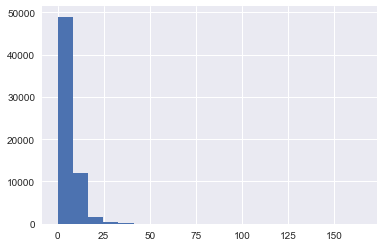

In [59]:
df['TaxiIn'].hist(bins=20)

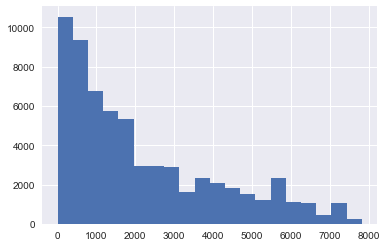

In [60]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Во-первых, значения предложенных переменных лежат в различных диапазонах: _FlightNum_ от 0 до 8000 тысяч,  _TaxiIn_ от 0 до 150, _Deptimehour_ от 0 до 25. Следовательно, при подборе весов могут возникнуть проблемы: неоторым переменным будут присвоены слишком маленькие веса, другим слишком большие.  

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [247]:
cat_columns = []
for i in df.columns:
    if df[i].dtype.name == 'object':
        cat_columns.append(i)

In [248]:
for x in ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime_Hour']:
    cat_columns.append(x) 

In [249]:
cat_columns

['UniqueCarrier',
 'Origin',
 'Dest',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime_Hour']

In [250]:
int_columns = []
for i in df.columns:
    if i not in cat_columns:
        int_columns.append(i)

In [251]:
int_columns

['ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Diverted']

In [252]:
def transform_data(data, cat_columns, int_columns):
    data[cat_columns] = data[cat_columns].fillna('nan')
    data[int_columns] = data[int_columns].fillna(0)
    scaler = StandardScaler()
    scaler.fit(data[int_columns])
    data[int_columns] = scaler.transform(data[int_columns])
    return pd.get_dummies(data, prefix=cat_columns, columns=cat_columns)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [253]:
df = transform_data(df, cat_columns, int_columns)

Также выкинем признаки, в которых ненулевых элемнтов меньше 10. Сделаем это, так как на дальнейших шагах возникают проблемы мультиколлинеарности. Кроме того, они могут мешать при обучении модели.

In [254]:
df.drop(df.columns[(df != 0).astype(int).sum(axis=0) < 10], 1, inplace = True)

In [255]:
len((df.columns))

573

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [342]:
X_train, X_test, y_train, y_test = train_test_split(df, DepDelay, test_size = 0.3, random_state = 12)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [344]:
linreg = LinearRegression()

In [345]:
linreg.fit(X_train[:1000], y_train[:1000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [346]:
y_pred_test = linreg.predict(X_test)
y_pred_train = linreg.predict(X_train[:1000])

In [347]:
len(y_pred_train)

1000

In [348]:
print('R^2 for test sample: ' + str(linreg.score(X_test,y_test)),
      'MSE for test sample: ' + str(mean_squared_error(y_test, y_pred_test)),
      'R^2 for train sample: ' + str(linreg.score(X_train[:1000], y_train[:1000])),
      'MSE for train sample: ' + str(mean_squared_error(y_train[:1000], y_pred_train)), sep = '\n')

R^2 for test sample: -7.11059832963e+19
MSE for test sample: 1.03641025009e+23
R^2 for train sample: 0.491981192736
MSE for train sample: 592.058183722


На тестовой выборке модель строит достаточно плохие результаты, так как коэффициент детерминации не просто мал, а равен отрицательному числу (что говорит о плохой предсказательной способности модели). Кроме того, значение _MSE_ принимает значительно большее значение для тестовой выборки, чем для тестовой, что может говорить о переобучении.

In [349]:
print(np.sort(linreg.coef_))

[ -8.10623192e+12  -6.58664424e+12  -5.28149923e+12  -5.28149923e+12
  -5.28149923e+12  -5.28149923e+12  -5.28149923e+12  -5.28149923e+12
  -5.28149923e+12  -4.24149388e+12  -2.45040340e+12  -2.45040340e+12
  -2.45040340e+12  -2.45040340e+12  -2.45040340e+12  -2.45040340e+12
  -2.45040340e+12  -2.45040340e+12  -2.45040340e+12  -2.45040340e+12
  -2.45040340e+12  -2.45040340e+12  -2.45040340e+12  -2.45040340e+12
  -2.45040340e+12  -2.45040340e+12  -2.45040340e+12  -2.45040340e+12
  -2.45040340e+12  -2.45040340e+12  -1.71672318e+12  -1.71672318e+12
  -1.71672318e+12  -1.71672318e+12  -1.71672318e+12  -1.71672318e+12
  -1.71672318e+12  -1.71672318e+12  -1.71672318e+12  -1.71672318e+12
  -1.71672318e+12  -1.71672318e+12  -1.64898551e+12  -3.12808096e+11
  -2.55279411e+11  -2.15619337e+11  -9.27002928e+10  -7.04589040e+10
  -6.98798147e+10  -6.38666349e+10  -6.37487257e+10  -6.37487257e+10
  -6.37487257e+10  -6.37487257e+10  -6.37487257e+10  -6.37487257e+10
  -6.37487257e+10  -6.37487257e+10

Некоторым весам присвоен очень большой вес, а некоторым очень маленький. Это может свидетельствовать о том, что при обучении были обнаружены какие-то закономерности, согласно которым можно точно предсказывать значения на обучающей выборке. Иначе говоря, возникает проблема переобучения. Об этом также свидетельсвтует коэффициент R^2, который получил высокое значение на обучающей выборке и очень маленькое на тестовой, и _MSE_, который огромен для тетсовой и мал для обучающей. Как доказательство привожу следующие графики:  

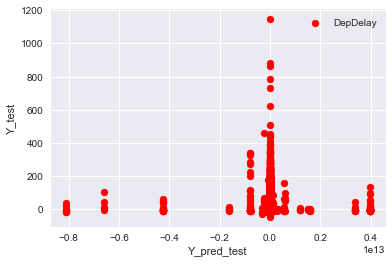

In [350]:
x_axis = y_pred_test
y_axis = y_test

plt.figure()
plt.scatter(x_axis, y_axis, c="r")
plt.legend(loc = 'upper right')
plt.xlabel("Y_pred_test")
plt.ylabel("Y_test")

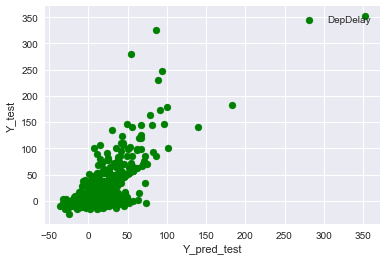

In [351]:
x_axis = y_pred_train
y_axis = y_train[:1000]

plt.figure()
plt.scatter(x_axis, y_axis, c="g")
plt.legend(loc = 'upper right')
plt.xlabel("Y_pred_test")
plt.ylabel("Y_test")

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [352]:
from sklearn import linear_model

In [353]:
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(X_train[:1000], y_train[:1000])
linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0, 20], cv=5)
reg.alpha_

10.0

In [354]:
y_pred_test_reg = reg.predict(X_test)
y_pred_train_reg = reg.predict(X_train[:1000])

In [355]:
print('R^2 for test sample: ' + str(reg.score(X_test,y_test)),
      'MSE for test sample: ' + str(mean_squared_error(y_test, y_pred_test_reg)),
      'R^2 for train sample: ' + str(reg.score(X_train[:1000], y_train[:1000])),
      'MSE for train sample: ' + str(mean_squared_error(y_train[:1000], y_pred_train_reg)), sep = '\n')

R^2 for test sample: 0.0210956205483
MSE for test sample: 1426.80894868
R^2 for train sample: 0.2884602926
MSE for train sample: 829.246675093


In [356]:
reg2 = linear_model.LassoCV(alphas=[0.1, 1.0, 10.0, 20])
reg2.fit(X_train[:1000], y_train[:1000])       
linear_model.LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
reg2.alpha_

1.0

In [357]:
y_pred_test_reg2 = reg2.predict(X_test)
y_pred_train_reg2 = reg2.predict(X_train[:1000])

In [359]:
print('R^2 for test sample: ' + str(reg2.score(X_test,y_test)),
      'MSE for test sample: ' + str(mean_squared_error(y_test, y_pred_test_reg2)),
      'R^2 for train sample: ' + str(reg2.score(X_train[:1000], y_train[:1000])),
      'MSE for train sample: ' + str(mean_squared_error(y_train[:1000], y_pred_train_reg2)), sep = '\n')

R^2 for test sample: 0.0036589375479
MSE for test sample: 1452.22390837
R^2 for train sample: 0.010741371545
MSE for train sample: 1152.90744834


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [273]:
X_train.insert(0, 'const', 1)

In [274]:
X_test.insert(0, 'const', 1)

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

Для совершения предсказаний сделаем некоторые преобразования, которые позволят решать нам задачу, полностью аналогичную обычному _MSE_. Для этого все элементы матрицы признаков X поделим на y построчно. То есть первая строка в новом X будет выглядеть так: $[x_{11}/y_{1}, x_{21}/y_{1}, ...]$. Наш вектор целевой переменной _y_ просто станет единичным вектором. 

Тогда наша задача примет следующий вид: $(y_{new}-X_{new}w)^{T}(y_{new}-X_{new}w)$

In [278]:
X_new = np.asmatrix(X_train)/np.asmatrix(y_train.values.reshape(-1, 1))
y_new = y_train.values.reshape(-1, 1)/y_train.values.reshape(-1, 1)

In [280]:
X_new.shape

(44382, 574)

In [281]:
y_new.shape

(44382, 1)

In [282]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return [X@w, w]

In [283]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    X_new = np.asmatrix(X)/np.asmatrix(y.values.reshape(-1, 1))
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    return 1/len(X)*float((y_new - X_new@w).T@(y_new - X_new@w))

In [284]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    X_new = np.asmatrix(X)/np.asmatrix(y.values.reshape(-1, 1))
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    return 2/(len(X))*X_new.T@(X_new@w - y_new)

In [285]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    X_new = np.asmatrix(X)/np.asmatrix(y.values.reshape(-1, 1))
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    return float(1/len(X)*(y_new - X_new@w).T@(y_new - X_new@w) + np.linalg.norm(w)**2)

In [286]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    X_new = np.asmatrix(X)/np.asmatrix(y.values.reshape(-1, 1))
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    return 2/len(X)*X_new.T@(X_new@w - y_new) + 2*w

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

Ниже представлено значение _MSPE_ для весов, подобранных самым оптимальным образом.  

In [290]:
w = np.linalg.inv(X_new.T@X_new)@X_new.T@y_new

In [291]:
get_func(w, X_train, y_train)

38.31309046495741

В градиентном спуске будем на каждом шаге уменьшать значение шага, чтобы не перепрыгивать минимум.

In [292]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    if is_reg == True:
        MSPE = [get_reg_func(w0, X, y)]
        for i in range(max_iter):
            w = w0 - step_size*(1/math.sqrt(1 + i))*get_reg_grad(w0, X, y)
            MSPE.append(get_func(w0, X, y))
            if np.linalg.norm(w - w0) <= eps:
                break
            w0 = w
    elif is_reg == False:
        MSPE = [get_func(w0, X, y)]
        for i in range(max_iter):
            w = w0 - step_size*(1/math.sqrt(1 + i))*get_grad(w0, X, y)
            MSPE.append(get_func(w0, X, y))
            if np.linalg.norm(w - w0) <= eps:
                break
            w0 = w
    return [w, MSPE]

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

#### Шаг = 1, нулевые веса

In [293]:
w0 = np.zeros(len(X_train.columns)).reshape(-1, 1)
w0.shape

(574, 1)

In [294]:
grad_res_1 = grad_descent(X_train, y_train, w0, 1, 1000, 0.0001, is_reg = False)

Значение функционала:  0.8880888911566711


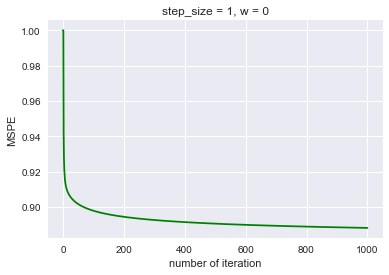

In [295]:
x_axis = np.arange(len(grad_res_1[1]))
y_axis = grad_res_1[1]

plt.figure()
plt.plot(x_axis, y_axis, c="g")
plt.title('step_size = 1, w = 0')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', grad_res_1[1][-1])

#### Шаг = 1, случайные веса.

In [296]:
w0 = np.random.rand(len(X_train.columns), 1)
w0.shape

(574, 1)

In [297]:
grad_res_2 = grad_descent(X_train, y_train, w0, 1, 1000, 0.0001, is_reg = False)

Значение функционала:  0.9085232952440523


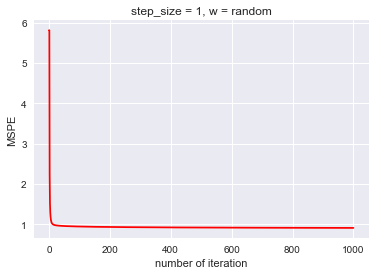

In [298]:
x_axis = np.arange(len(grad_res_2[1]))
y_axis = grad_res_2[1]

plt.figure()
plt.plot(x_axis, y_axis, c="r")
plt.title('step_size = 1, w = random')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', grad_res_2[1][-1])

#### Шаг = 0.001, нулевые веса

In [299]:
w0 = np.zeros(len(X_train.columns)).reshape(-1, 1)
w0.shape

(574, 1)

In [300]:
grad_res_3 = grad_descent(X_train, y_train, w0, 0.001, 1000, 0.0001, is_reg = False)

Значение функционала:  0.9996926226415526


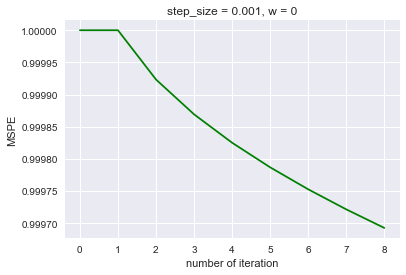

In [301]:
x_axis = np.arange(len(grad_res_3[1]))
y_axis = grad_res_3[1]

plt.figure()
plt.plot(x_axis, y_axis, c="g")
plt.title('step_size = 0.001, w = 0')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', grad_res_3[1][-1])

#### Шаг = 0.001, случайные веса

In [302]:
w0 = np.random.rand(len(X_train.columns), 1)
w0.shape

(574, 1)

In [303]:
grad_res_4 = grad_descent(X_train, y_train, w0, 0.001, 1000, 0.0001, is_reg = False)

Значение функционала:  5.98174454526765


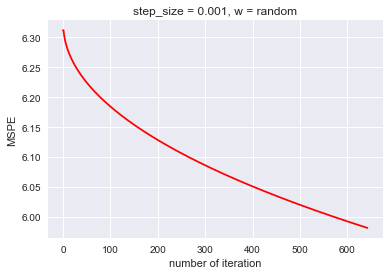

In [304]:
x_axis = np.arange(len(grad_res_4[1]))
y_axis = grad_res_4[1]

plt.figure()
plt.plot(x_axis, y_axis, c="r")
plt.title('step_size = 0.001, w = random')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', grad_res_4[1][-1])

#### Шаг = 10, нулевые веса

In [305]:
w0 = np.zeros(len(X_train.columns)).reshape(-1, 1)
w0.shape

(574, 1)

In [306]:
grad_res_5 = grad_descent(X_train, y_train, w0, 10, 1000, 0.0001, is_reg = False)

Значение функционала:  0.8800174671669274


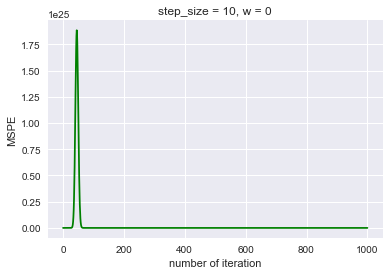

In [307]:
x_axis = np.arange(len(grad_res_5[1]))
y_axis = grad_res_5[1]

plt.figure()
plt.plot(x_axis, y_axis, c="g")
plt.title('step_size = 10, w = 0')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(grad_res_5[1]))

#### Шаг = 10, случайные веса

In [308]:
w0 = np.random.rand(len(X_train.columns), 1)
w0.shape

(574, 1)

In [309]:
grad_res_6 = grad_descent(X_train, y_train, w0, 10, 1000, 0.0001, is_reg = False)

Значение функционала:  0.8834294053845702


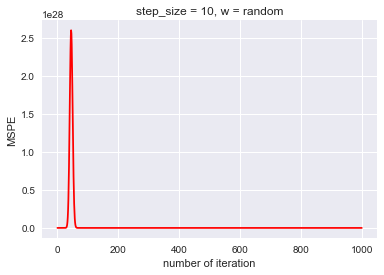

In [310]:
x_axis = np.arange(len(grad_res_6[1]))
y_axis = grad_res_6[1]

plt.figure()
plt.plot(x_axis, y_axis, c="r")
plt.title('step_size = 10, w = random')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(grad_res_6[1]))

Самый хороший результат получается для данных с нулевыми весами и шагом 10, но сходится он медленнее. Однако быстрее всех сходятся данные со случайными весами и шагом 0.001. Следовательно, чем больше начальный шаг, тем лучше результат. Однако чем больше шаг, тем меньше скорость сходимости. Также на данных видно, что с нулевыми весами выходит в среднем более хороший результат, что говорит о том, что они ближе к оптимальному значению. 

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

#### Шаг = 1, нулевые веса

In [311]:
w0 = np.zeros(len(X_train.columns)).reshape(-1, 1)
w0.shape

(574, 1)

In [312]:
grad_res_reg_1 = grad_descent(X_train, y_train, w0, 1, 1000, 0.0001, is_reg = True)

Значение функционала:  0.9414884574293677


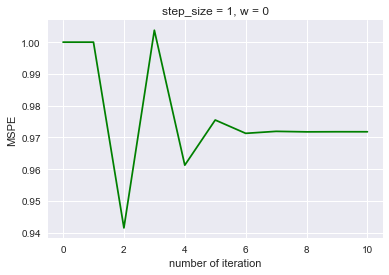

In [313]:
x_axis = np.arange(len(grad_res_reg_1[1]))
y_axis = grad_res_reg_1[1]

plt.figure()
plt.plot(x_axis, y_axis, c="g")
plt.title('step_size = 1, w = 0')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(grad_res_reg_1[1]))

#### Шаг = 1, случайные веса

In [314]:
w0 = np.random.rand(len(X_train.columns), 1)
w0.shape

(574, 1)

In [315]:
grad_res_reg_2 = grad_descent(X_train, y_train, w0, 1, 1000, 0.0001, is_reg = True)

Значение функционала:  0.9715674834851099


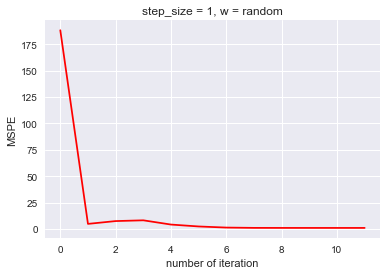

In [316]:
x_axis = np.arange(len(grad_res_reg_2[1]))
y_axis = grad_res_reg_2[1]

plt.figure()
plt.plot(x_axis, y_axis, c="r")
plt.title('step_size = 1, w = random')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(grad_res_reg_2[1]))

#### Шаг = 10, нулевые веса

In [317]:
w0 = np.zeros(len(X_train.columns)).reshape(-1, 1)
w0.shape

(574, 1)

In [318]:
grad_res_reg_3 = grad_descent(X_train, y_train, w0, 10, 1000, 0.0001, is_reg = True)

Значение функционала:  0.9716196234999415


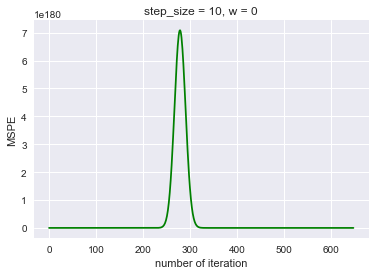

In [319]:
x_axis = np.arange(len(grad_res_reg_3[1]))
y_axis = grad_res_reg_3[1]

plt.figure()
plt.plot(x_axis, y_axis, c="g")
plt.title('step_size = 10, w = 0')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(grad_res_reg_3[1]))

#### Шаг = 10, случайные веса

In [320]:
w0 = np.random.rand(len(X_train.columns), 1)
w0.shape

(574, 1)

In [321]:
grad_res_reg_4 = grad_descent(X_train, y_train, w0, 10, 1000, 0.0001, is_reg = True)

Значение функционала:  0.9715570169404885


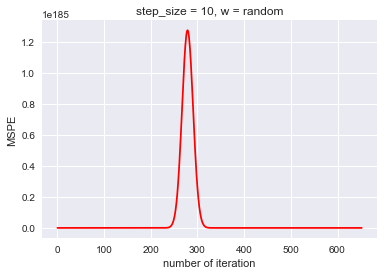

In [322]:
x_axis = np.arange(len(grad_res_reg_4[1]))
y_axis = grad_res_reg_4[1]

plt.figure()
plt.plot(x_axis, y_axis, c="r")
plt.title('step_size = 10, w = random')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(grad_res_reg_4[1]))

#### Шаг = 0.001, нулевые веса

In [323]:
w0 = np.zeros(len(X_train.columns)).reshape(-1, 1)
w0.shape

(574, 1)

In [324]:
grad_res_reg_5 = grad_descent(X_train, y_train, w0, 0.001, 1000, 0.0001, is_reg = True)

Значение функционала:  0.9996936563296276


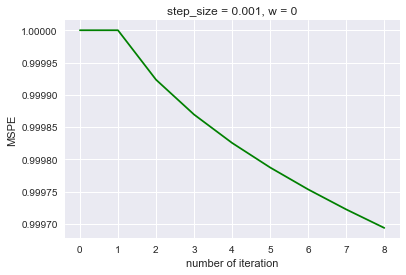

In [325]:
x_axis = np.arange(len(grad_res_reg_5[1]))
y_axis = grad_res_reg_5[1]

plt.figure()
plt.plot(x_axis, y_axis, c="g")
plt.title('step_size = 0.001, w = 0')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(grad_res_reg_5[1]))

#### Шаг = 0.001, случайные веса

In [326]:
w0 = np.random.rand(len(X_train.columns), 1)
w0.shape

(574, 1)

In [327]:
grad_res_reg_6 = grad_descent(X_train, y_train, w0, 0.001, 1000, 0.0001, is_reg = True)

Значение функционала:  5.171875991295827


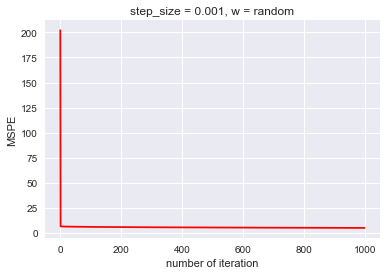

In [328]:
x_axis = np.arange(len(grad_res_reg_6[1]))
y_axis = grad_res_reg_6[1]

plt.figure()
plt.plot(x_axis, y_axis, c="r")
plt.title('step_size = 0.001, w = random')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(grad_res_reg_6[1]))

Видно, что наличие регулярицзации ускоряет скорость сходмиости, однако ухудшает значение _MSPE_. Это говорит о том, что метод перестает закручиваться и вероятность переобучения значительно снижается. Поэтому худшие результаты _MSPE_ для обучающей выборки вполне себе закономерны, так как теперь нет переобучения. 

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [360]:
def random_grad_reg(w, X, y):
    r = np.random.randint(len(X))
    X = np.asmatrix(X)
    return -2*float(1 - X[0]@w/y_train.iloc[r])*X[0].T/y_train.iloc[r] + 2*w

In [361]:
def random_grad(w, X, y):
    r = np.random.randint(len(X))
    X = np.asmatrix(X)
    return -2*float(1 - X[0]@w/y_train.iloc[r])*X[0].T/y_train.iloc[r]

In [362]:
def sgd(X, y, w0, step_size, max_iter, eps, is_reg):
    if is_reg == True:
        MSPE = [get_reg_func(w0, X, y)]
        for i in range(max_iter):
            w = w0 - step_size/math.sqrt(1 + i)*random_grad_reg(w0, X, y)
            MSPE.append(get_func(w, X, y))
            if np.linalg.norm(w - w0) <= eps:
                break
            w0 = w
    elif is_reg == False:
        MSPE = [get_func(w0, X, y)]
        for i in range(max_iter):
            w = w0 - step_size/math.sqrt(1 + i)*random_grad_reg(w0, X, y)
            MSPE.append(get_func(w, X, y))
            if np.linalg.norm(w - w0) <= eps:
                break
            w0 = w
    return [w0, MSPE]

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [363]:
w0 = np.zeros(len(X_train.columns)).reshape(-1, 1)
w0.shape

(573, 1)

In [364]:
sgd_1 = sgd(X_train, y_train, w0, 1, 200, 0.0001, is_reg = False)

Значение функционала:  0.9898528146307481


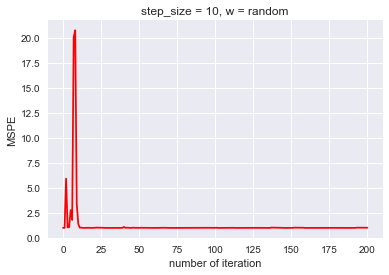

In [365]:
x_axis = np.arange(len(sgd_1[1]))
y_axis = sgd_1[1]

plt.figure()
plt.plot(x_axis, y_axis, c="r")
plt.title('step_size = 10, w = random')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(sgd_1[1]))

In [366]:
y_pred_1 = make_pred(X_test, sgd_1[0])[0]

In [367]:
from sklearn.metrics import r2_score
R2_1 = r2_score(y_test, y_pred_1)
MSE_1 = mean_squared_error(y_test, y_pred_1)
MSPE_1 = get_func(sgd_1[0], X_test, y_test)
print('R^2 sgd withut Reg: ' + str(R2_1), 
     'MSE sgd without Reg: ' + str(MSE_1), 
     'MSPE sgd without Reg: ' + str(MSPE_1), sep ='\n')

R^2 sgd withut Reg: -0.0800098753217
MSE sgd without Reg: 1574.17597379
MSPE sgd without Reg: 1.0089337318801743


In [368]:
sgd_2 = sgd(X_train, y_train, w0, 1, 200, 0.00001, is_reg = True)

Значение функционала:  0.9899493351233608


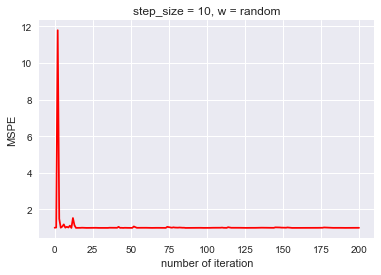

In [369]:
x_axis = np.arange(len(sgd_2[1]))
y_axis = sgd_2[1]

plt.figure()
plt.plot(x_axis, y_axis, c="r")
plt.title('step_size = 10, w = random')
plt.xlabel("number of iteration")
plt.ylabel("MSPE")
print('Значение функционала: ', min(sgd_2[1]))

In [370]:
y_pred_2 = make_pred(X_test, sgd_2[0])[0]

In [375]:
R2_2 = r2_score(y_test, y_pred_2)
MSE_2 = mean_squared_error(y_test, y_pred_2)
MSPE_2 = get_func(sgd_2[0], X_test, y_test)
print('R^2 sgd withut Reg: ' + str(R2_2), 
     'MSE sgd without Reg: ' + str(MSE_2), 
     'MSPE sgd without Reg: ' + str(MSPE_2), sep ='\n')

R^2 sgd withut Reg: -0.0805950163467
MSE sgd without Reg: 1575.0288502
MSPE sgd without Reg: 0.9956944575468631


**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

Несмотря на регуляризацию, результаты выходят менее качественными, если судить по функции потерь. Тем не менее сходимость происходит быстрее. Это можно обосновать следующим образом: наличие регуляризации ведет к тому, что теперь шаги стали болечувствительны к значению весов, а как итог, они демонстрируют более скорую сходимость. Кроме того, можно сделать заключения аналогичные тем, что были сделаны в прошлом пункте. 

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [376]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_test = linreg.predict(X_test)

In [377]:
def final_MSPE(y, y_pred):
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    y_new_pred = y_pred.reshape(-1, 1)/y.values.reshape(-1, 1)
    return 1/len(y)*float((y_new - y_new_pred).T@(y_new - y_new_pred))

In [378]:
final_MSPE(y_test, y_pred_test)

33.84492580360996

Такой результат можно объяснить очень слабой предсказательной способностью модели, которая возникает из-за переобучения. Если сравнивать с пунктом 17, то результаты, которые были получены там довольно трудно сравнивать с нынешним результатом, так как там считалась метрика для трэин выборки. Однако результаты там вышли лучше потому что обучение происходило как раз по этой метрике, да и получить на обучающей выборке результат, худший, чем на тестовой, довольно трудно.